# <h1><center><font color=indigo>Dataset Analysis for On Time Performance <br> by Nadia Ferrer </font></center></h1>

## <font color=blue> Background Information </font>

#### Description of Dataset and Reason for Interest
The data set that I will be using for the term project is on time performance, describing arrival delays for non-stop domestic flights by major air carriers for the year of 2008. The data on Enigma Public is only available for this year. However, I believe a lot can be learned from this year as there a great amount of detailed data that I might not be able to dive deep into over the span of various years with such a great deal of data. Next steps, after this project, could include taking assumptions from this semester’s data and comparing those findings across various years.

Nonetheless, the data set includes variables for departure and arrival delay, origin and destination airports, flight numbers and actual departure information, et cetera. I am particularly interested in this data set for two reasons: 1) my constant travels to and from Boston year round, as I am originally from Chicago, or have had opportunity to travel abroad and 2) my background in engineering psychology/human factors that has trained me to be curious about human behavior and how it contributes to certain processes/services. 

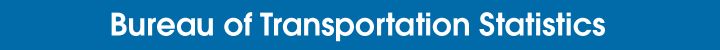

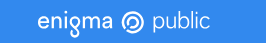

From this data found through Enigma Public, I anticipate being able to find possible trends in flights being on time or delayed, and if delayed by how much, and whether that interval means there might be another trend emerging. More specifically, the variables month, day of the month, and day of the week have a higher likelihood of being delayed for certain or many airlines (identified by the variable Airline ID). For example, it would be interesting to see if and which airlines are more likely to have flights delayed in the last week of May, on a Friday than on a Wednesday, in the first week of October. 

I believe that this data analysis replication across the various airlines will be useful information for algorithms used for Hopper and other flight booking agencies in search for the cheapest flight. Customers might want to know the cost or tradeoff of booking a cheap flight and whether delays for a certain airline is higher based on a set of trends. Initially how this data has been used was through the Bureau of Transportation Statistics to report airline performance and causes of flight delays. On their website, there are published, monthly, air travel consumer reports that are available to the general public. These findings, unfortunately, are not the easiest to read or understand what is meant by the data. In efforts to understand them myself, I believe this project would be a great opportunity to begin understanding so that I can learn how this information could better be presented.


#### Possible Identified Data Issues
Possible issues that I’ve identified are: missing data (i.e. weather delay) and interpreting variables (i.e. total ground time away). For the missing data, I will need to figure out the relevance of those variables and what percentage of missing data there is for certain columns/rows. (Additionally, which data to cut down and to or too not use.) Regarding interpreting the variables, I may do need to do more research on what these terms might mean and most significant variables that are normally attributed to flight delay. 

Provided Link to Dataset
https://public.enigma.com/datasets/on-time-performance-2008/0e506417-3449-4051-accb-83c743e6e18d
_____________________________________________________________________________________________________________________

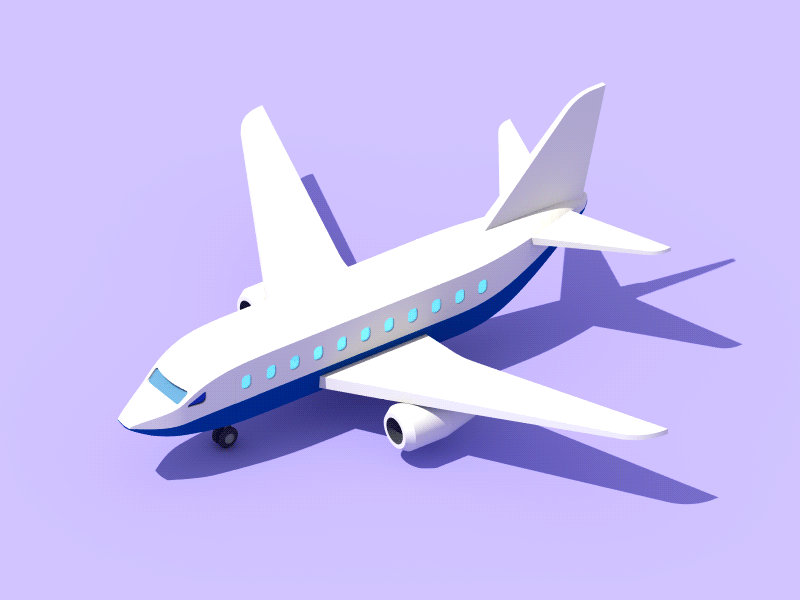

# <font color=indigo> Part I: Importing and Cleaning Data </font>

Since the dataset was too large to upload to github, I decided to upload the file to Box and load the data from there. After loading and viewing the data, it became apparent that there were a few empty columns or not as relevant variables. 

#### <font color=indigo> About the Data </font>
The variables included in the dataset are: 

year, quarter, month, day of the month, day of the week, flight date, unique carrier, airline ID, tail number, airport origin, origin city, origin state, ... carrier, arrival delay in minutes, weather delay, security delay, nas delay, late aircraft delay, flight number, and serial ID.

In [1]:
import pandas as pd    
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import l1_min_c
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv("https://tufts.box.com/shared/static/tm0j9xbunpofpgqqazjm7ilajfod2opq.csv")
df.head()

/Users/NadiaFerrer/miniconda3/envs/em212/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (69,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,year,quarter,month,dayofmonth,dayofweek,flightdate,uniquecarrier,airlineid,carrier,tailnum,...,div5airport,div5airportid,div5airportseqid,div5wheelson,div5totalgtime,div5longestgtime,div5wheelsoff,div5tailnum,filler,serialid
0,2008,4,10,17,5,2008-10-17T00:00:00,AA,19805,AA,N634AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1063502
1,2008,4,10,7,2,2008-10-07T00:00:00,AA,19805,AA,N4XLAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1062508
2,2008,4,10,3,5,2008-10-03T00:00:00,AA,19805,AA,N527AA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1061355
3,2008,4,10,21,2,2008-10-21T00:00:00,AA,19805,AA,N5DWAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1059967
4,2008,4,10,13,1,2008-10-13T00:00:00,AA,19805,AA,N4YGAA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1062513


## <font color=lavendar> Step 1. Selecting Certain Variables from the Data </font>

Considering the data provides information than I need for my the scope of my project, I've decided to select specific variables that I believe I need. I did not want to delete these rows, as I might not be aware of my need for them later. Selecting certain columns also makes it easier to visualize my data. The variables that I am most concerned with are the the arrival delay in minutes and the carrier. This variables are important for me to look at first so that I can understand the general time in minutes that the aircrafts are delayed by. In addition, I wanted to select all the data that described the types of delays that contributed to the arrival delay time in minutes. Eventually, I want to be able to look at the delay times and causes in relation to the carrier, day of the week, day of month, and the month. I want to see if a specific carrier or flight (in general) is more likely be delayed at a specific time in the day, week, or month.

Variable descriptions: https://www.transtats.bts.gov/DL_SelectFields.asp

In [ ]:
subset_cols = ["month","dayofmonth", "dayofweek","carrier","arrdelayminutes", "carrierdelay","weatherdelay","nasdelay","securitydelay","lateaircraftdelay"]
df_subset = df[subset_cols].fillna(0)
df_subset.head()

#### Note: NaN for delays means that there was a delay time of zero

## <font color=lavendar> Step 2: (Optional) Selecting Certain Rows of Data </font>

Due to the fact that there are over 1,000,000 entries within this dataset, I might need to select certain rows of data, opposed to the entire dataset to run my data more quickly. However, with efficiency, I want to make sure that I am not not biasing my data in anyway, based off of my preconceptions as to what the results should or might look like. In other words, it is important that my reasoning behind selecting the data should not specifically be including or excluding certain information for a particular outcome. Even if done so unintentionally, that wouldn't be great either.

In [4]:
rows = list(range(10))
rows
df_subset.iloc[rows]

,month,dayofmonth,dayofweek,carrier,arrdelayminutes,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
0,10,17,5,AA,3.0,NaN,NaN,NaN,NaN,NaN
1,10,7,2,AA,0.0,NaN,NaN,NaN,NaN,NaN
2,10,3,5,AA,0.0,NaN,NaN,NaN,NaN,NaN
3,10,21,2,AA,0.0,NaN,NaN,NaN,NaN,NaN
4,10,13,1,AA,0.0,NaN,NaN,NaN,NaN,NaN
5,10,26,7,AA,340.0,334.0,0.0,6.0,0.0,0.0
6,10,15,3,AA,0.0,NaN,NaN,NaN,NaN,NaN
7,10,27,1,AA,0.0,NaN,NaN,NaN,NaN,NaN
8,10,30,4,AA,1.0,NaN,NaN,NaN,NaN,NaN
9,10,18,6,AA,0.0,NaN,NaN,NaN,NaN,NaN


# <font color=Indigo> Part II: Exploratory Data Analysis </font>
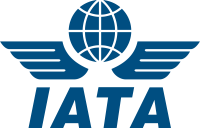

## <font color=blue> The carriers codes are determined by the International Air Transportation Association (IATA) </font>

For me, the easiest way to break down the data, visually was to see which carriers there were. What I am interested in doing is seeing how many flights there were per carrier that year, how many planes there were pere carrier, and how many of the same flights there were as well. I still need to do more research and narrowing of what information would be most beneficial to know for the scope of this project. Becuase there is so much information and I am not as familiar with flight statistics, I've had to do a lot of research on how the variable were collected, what they mean, and how they were mesaured.

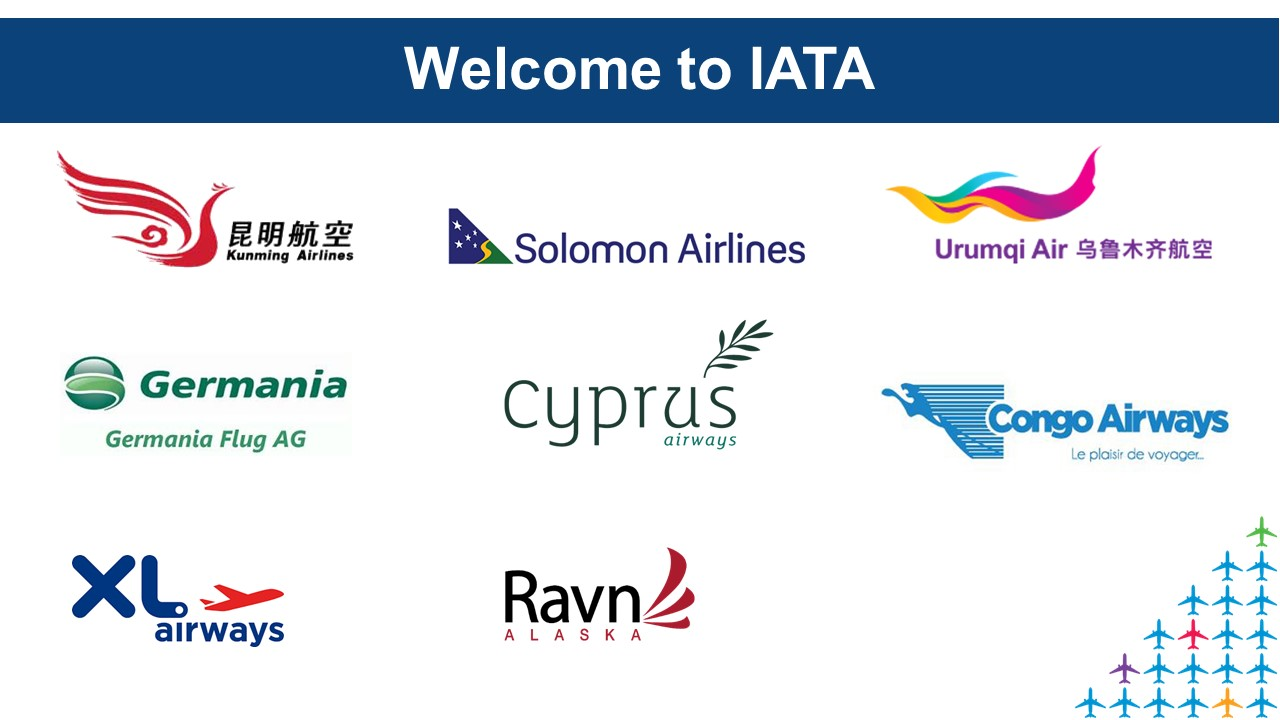

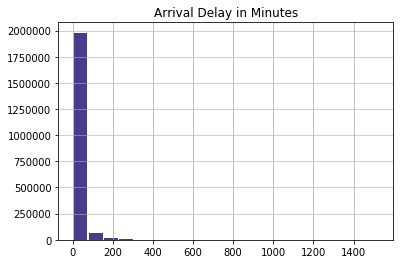

In [5]:
df_subset.arrdelayminutes.hist(grid=True, bins=20, rwidth=0.9,color='#483D8B')
plt.title('Arrival Delay in Minutes')
plt.grid(axis='y', alpha=0.75)

# <font color=Lavendar> Determining Flights Per Carrier </font>

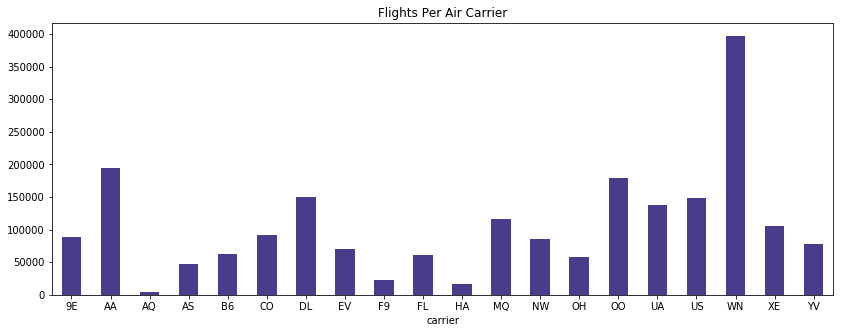

In [6]:
plt.title('Flights Per Air Carrier')
plt.grid(axis='y', alpha=0.75)
df.groupby('carrier')['flightnum'].count().plot.bar(rot = 0, figsize=(14,5),color='#483D8B')

| Carrier ID    | Carrier Name             |
| :------------ |:------------------------ | 
| 9E            |  Endeavor Air            | 
| AA            |  American Airlines       |   
| AQ            |  9 Air Co LTD            |    
| AS            |  Alaska Airlines         |    
| B6            |  JetBlue Airways Corp    |    
| CO            |  Continental Airlines    |   
| DL            |  Delta Airlines, Inc     |   
| EV            |  Express Jet Airlines    |    
| F9            |  Frontier Airlines, Inc  |    
| FL            |  Florida West Airways    |   
| HA            |  Hawaiian Airlines, Inc  |    
| MQ            |  Envoy Air, Inc          |   
| NW            |  Northwest Airlines      |   
| OH            |  PSA Airlines            |   
| OO            |  SkyWest Airlines        |   
| UA            |  United Airlines         |    
| US            |  US Airways              |    
| WN            |  Southwest Airlines Co   |   
| XE            |  Delux Public Charter    | 
| YV            |  Mesa Airlines           | 

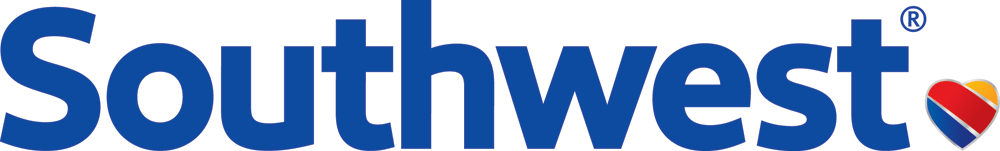


### <font color=blue> Results = WN - Southwest Airlines has the greatest number of flights </font>###
Considerign that Southwest had the greatest number of flights, it would be interesting to see whether or not they have the most delays, as a low budget airlines. On thing I could do would be to compare the low budget airlines against those that aren't and compare their frequency of delays and delay times. Seeing the distribution of air carriers, I believe has led me to narrow down my broader research question. 

## <font color=blue> Analyzing Arrival Delays in Minutes by Month </font>##

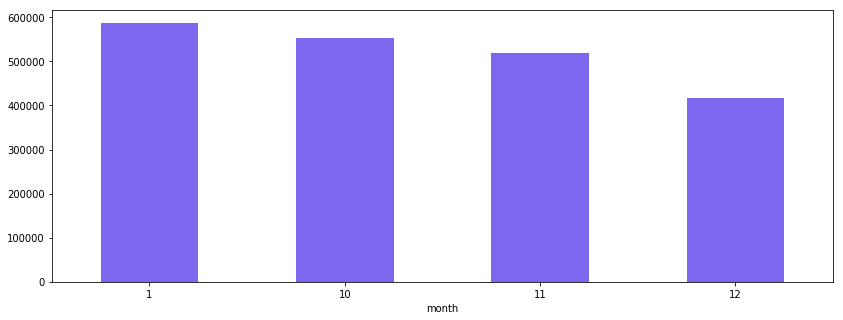

In [7]:
df_subset.groupby('month')['arrdelayminutes'].count().plot.bar(rot = 0, figsize=(14,5),color='#7B68EE')

## <font color=blue> Analyzing Arrival Delays in Minutes by Day of the Week </font>##

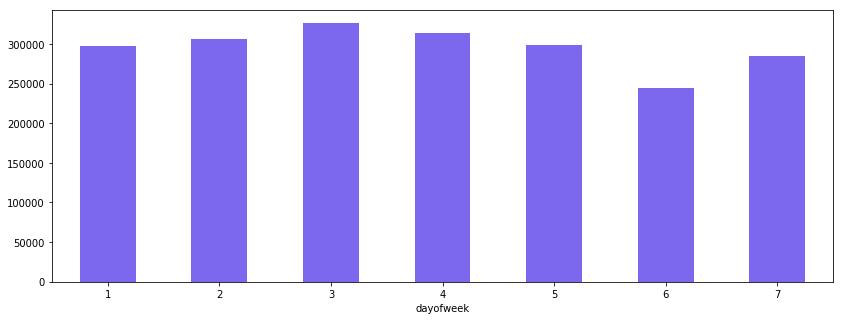

In [8]:
df_subset.groupby('dayofweek')['arrdelayminutes'].count().plot.bar(rot = 0, figsize=(14,5),color='#7B68EE')

## <font color=blue>  Identifying Types of Delays (Causes) </font> #

 ## <font color=carolina> FIXED </font> ##

I want to make a histogram for each type of delay cause, but I don't know exactly how to do that yet. Specifically, I do not know how to use the groupby to select and analyze data by category. As of now, I only know how to use groupby to grop the data. Possibly, this is all that method is capable of doing and that there is another way I can reselect the data by carriers and anaylze. I'm thinking I might need to make another table, though that is what I thought I was doing in the following lines of code for each cause of delays.

#### Note: NaN means there was no delay for that flight

In [9]:
df_delays = df_subset.iloc[:, 3:10]
df_delays.head()

,carrier,arrdelayminutes,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
0,AA,3.0,NaN,NaN,NaN,NaN,NaN
1,AA,0.0,NaN,NaN,NaN,NaN,NaN
2,AA,0.0,NaN,NaN,NaN,NaN,NaN
3,AA,0.0,NaN,NaN,NaN,NaN,NaN
4,AA,0.0,NaN,NaN,NaN,NaN,NaN


## <font color=pear> Carrier Delay (in Minutes) </font> ##


In [10]:
carrier_delay = df_delays.groupby(['carrier', 'carrierdelay']).size()
carrier_delay.head()

carrier  carrierdelay
9E       0.0             11415
         6.0                90
         7.0               111
         8.0               122
         9.0                90
dtype: int64

In [11]:
carrier_delay.describe()

count     5582.000000
mean        78.008957
std        881.784067
min          1.000000
25%          1.000000
50%          4.000000
75%         20.750000
max      31126.000000
dtype: float64

## <font color=pear> Weather Delay (in Minutes) </font> ##

In [12]:
weather_delay = df_delays.groupby(['carrier', 'arrdelayminutes']).size()
weather_delay.head()

carrier  arrdelayminutes
9E       0.0                51615
         1.0                 1822
         2.0                 1716
         3.0                 1511
         4.0                 1457
dtype: int64

In [13]:
weather_delay.describe()

count      7307.000000
mean        283.696319
std        4144.914605
min           1.000000
25%           2.000000
50%           8.000000
75%          52.000000
max      243860.000000
dtype: float64

## <font color=pear> National Air System Delay (in Minutes) </font> ##

In [14]:
nas_delay = df_delays.groupby(['nasdelay', 'arrdelayminutes']).size()
nas_delay.describe()

count    18068.000000
mean        24.100398
std        200.350877
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max       7563.000000
dtype: float64

In [15]:
nas_delay.describe()

count    18068.000000
mean        24.100398
std        200.350877
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max       7563.000000
dtype: float64

## <font color=pear> Security Delay (in Minutes) </font> ##

In [16]:
security_delay = df_delays.groupby(['carrier', 'securitydelay']).size()
security_delay.head()

carrier  securitydelay
9E       0.0              17480
         6.0                  1
         7.0                  1
         8.0                  2
         11.0                 1
dtype: int64

In [17]:
security_delay.describe()

count      519.000000
mean       839.009634
std       5230.444963
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max      71373.000000
dtype: float64

## <font color=blue> Correlations </font> ##

In [28]:
# columns with features
features = df_subset.columns.tolist()
features = [f for f in features if f != "On Time"]

In [25]:
# correlations among features
corr = df_subset.corr()

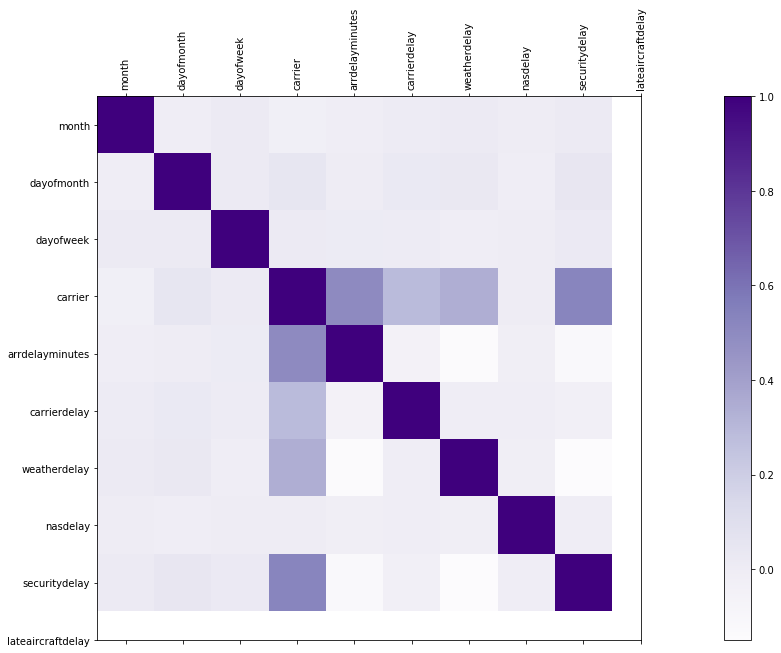

In [31]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='Purples')
fig.colorbar(cax)

plt.xticks(range(len(features)), features, rotation=90)
plt.yticks(range(len(features)), features, rotation=0)

plt.show()

Explain correlation

# <font color=indigo> Merging Datasets  </font> #
The following dataset is from the same source as the original dataset and collects the same type of data. However, this dataset is more recent, solely for the month of January 2019. I would like to use merge and compare this data to see whether there has been an increase or decrease in the delay times in minuttes for carriers and/or days of the week.

<font color=indigo> Because the dataset was too large to use through github, I decided to upload the dataset to Box (a cloud storage site) so that I could access the data from there. </font>

In [23]:
df2 = pd.read_csv("https://tufts.box.com/shared/static/1bsxmeict01foe6is2owlell11p8hosx.csv")
df2.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,MKT_CARRIER_FL_NUM,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN_AIRPORT_ID,...,DIVERTED,DUP,ACTUAL_ELAPSED_TIME,FLIGHTS,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 48
0,2019,1,1,19,6,2019-01-19,5245,9E,N176PQ,13487,...,0.0,N,106.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,1,20,7,2019-01-20,5245,9E,N309PQ,13487,...,0.0,N,93.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,1,21,1,2019-01-21,5245,9E,N176PQ,13487,...,0.0,N,118.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,1,22,2,2019-01-22,5245,9E,N135EV,13487,...,0.0,N,107.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,1,1,23,3,2019-01-23,5245,9E,N294PQ,13487,...,0.0,N,120.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


## <font color=lavendar> Step 1: Selecting Subset of Variables to Include in Data </font> ##


### <font color=indigo> In order to concatenate both datasets, I first had to rename the variables so that they were exactly the same. Otherwise, when I tried, it joined the datasets side by side. This was not what I wanted, so I decided to manually change each of the variable names. </font> ###

In [32]:
subset2_cols = ["MONTH","DAY_OF_MONTH", "DAY_OF_WEEK","OP_UNIQUE_CARRIER","ARR_DELAY", "CARRIER_DELAY","WEATHER_DELAY","NAS_DELAY","SECURITY_DELAY","LATE_AIRCRAFT_DELAY"]
df2_subset = df2[subset2_cols]
df2_subset.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,1,19,6,9E,-25.0,NaN,NaN,NaN,NaN,NaN
1,1,20,7,9E,-37.0,NaN,NaN,NaN,NaN,NaN
2,1,21,1,9E,-17.0,NaN,NaN,NaN,NaN,NaN
3,1,22,2,9E,-23.0,NaN,NaN,NaN,NaN,NaN
4,1,23,3,9E,-12.0,NaN,NaN,NaN,NaN,NaN


## <font color=lavendar> Step 2: Renaming Variables to Match One Another </font> ##


In [33]:
df2_subset = df2_subset.rename(columns={'MONTH':'month', 'DAY_OF_MONTH':'dayofmonth', 'DAY_OF_WEEK':'dayofweek', 'OP_UNIQUE_CARRIER':'carrier', 'ARR_DELAY':'arrdelayminutes', 'CARRIER_DELAY':'carrierdelay', 'WEATHER_DELAY':'weatherdelay', 'NAS_DELAY':'nasdelay', 'SECURITY_DELAY':'securitydelay', 'LATE_AIRCRAFT_DELAY':'lateaircraftdelay'})
df2_subset.head()


,month,dayofmonth,dayofweek,carrier,arrdelayminutes,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
0,1,19,6,9E,-25.0,NaN,NaN,NaN,NaN,NaN
1,1,20,7,9E,-37.0,NaN,NaN,NaN,NaN,NaN
2,1,21,1,9E,-17.0,NaN,NaN,NaN,NaN,NaN
3,1,22,2,9E,-23.0,NaN,NaN,NaN,NaN,NaN
4,1,23,3,9E,-12.0,NaN,NaN,NaN,NaN,NaN


## <font color=lavendar> Step 3: Concatenating the Datasets </font> ##

In [34]:
frames = [df_subset, df2_subset]
df3 = pd.concat(frames)
df3

,month,dayofmonth,dayofweek,carrier,arrdelayminutes,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
0,10,17,5,AA,3.0,NaN,NaN,NaN,NaN,NaN
1,10,7,2,AA,0.0,NaN,NaN,NaN,NaN,NaN
2,10,3,5,AA,0.0,NaN,NaN,NaN,NaN,NaN
3,10,21,2,AA,0.0,NaN,NaN,NaN,NaN,NaN
4,10,13,1,AA,0.0,NaN,NaN,NaN,NaN,NaN
5,10,26,7,AA,340.0,334.0,0.0,6.0,0.0,0.0
6,10,15,3,AA,0.0,NaN,NaN,NaN,NaN,NaN
7,10,27,1,AA,0.0,NaN,NaN,NaN,NaN,NaN
8,10,30,4,AA,1.0,NaN,NaN,NaN,NaN,NaN
9,10,18,6,AA,0.0,NaN,NaN,NaN,NaN,NaN


I want to conduct more exploratory data analysis on the new merged dataset so that I can see if there were noticeable changes and where those changes have occured.

In [35]:
df3.arrdelayminutes.describe()

count    2.690618e+06
mean     1.119221e+01
std      3.919119e+01
min     -8.500000e+01
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+01
max      1.707000e+03
Name: arrdelayminutes, dtype: float64

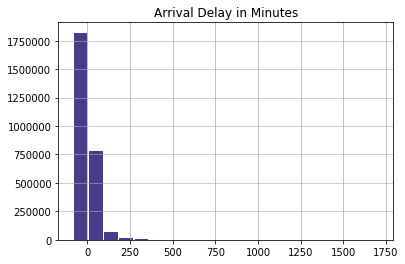

In [36]:
df3.arrdelayminutes.hist(grid=True, bins=20, rwidth=0.9,color='#483D8B')
plt.title('Arrival Delay in Minutes')
plt.grid(axis='y', alpha=0.75)

This is interesting seeing how the histogram graph changed when the new dataset was merged. I want to look further into what caused this change. 

## <font color=Blue> Merged Dataset: Flights Per Carrier Distribution</font> ##

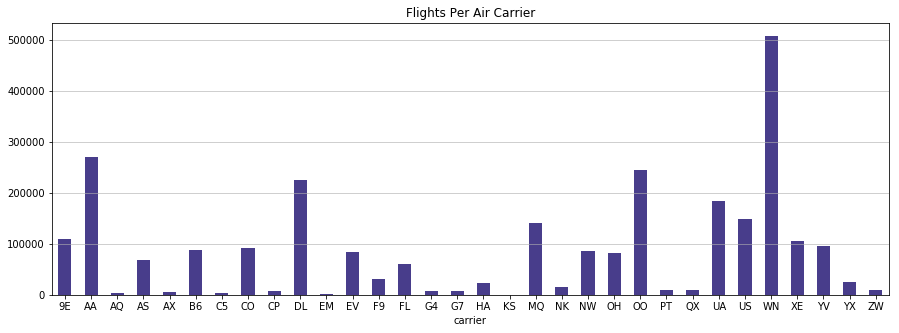

In [37]:
df3.groupby('carrier')['carrier'].count().plot.bar(rot = 0, figsize=(15,5),color='#483D8B')
plt.title('Flights Per Air Carrier')
plt.grid(axis='y', alpha=0.75)

There are new carriers added to the list

# <font color=indigo> Machine Learning </font> #
Source: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

## <font color=lavendar> Step 1: Data Acquisition </font> ##

In [67]:
features = df3.fillna(0)
features.describe()

,month,dayofmonth,dayofweek,arrdelayminutes,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
count,2.755410e+06,2.755410e+06,2.755410e+06,2.755410e+06,2.755410e+06,2.755410e+06,2.755410e+06,2.755410e+06,2.755410e+06
mean,6.438492e+00,1.583302e+01,3.890327e+00,1.092903e+01,3.270924e+00,6.422293e-01,3.436616e+00,1.531315e-02,4.449441e+00
std,4.971286e+00,8.901528e+00,1.960043e+00,3.876479e+01,2.145791e+01,1.116419e+01,1.641136e+01,9.008498e-01,2.115154e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,-8.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,8.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+01,1.600000e+01,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.100000e+01,2.300000e+01,5.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.200000e+01,3.100000e+01,7.000000e+00,1.707000e+03,1.638000e+03,1.416000e+03,1.447000e+03,8.160000e+02,1.514000e+03


In [68]:
features = pd.get_dummies(features)

In [69]:
features.iloc[:,5:].head(5)

,weatherdelay,nasdelay,securitydelay,lateaircraftdelay,carrier_9E,carrier_AA,carrier_AQ,carrier_AS,carrier_AX,carrier_B6,...,carrier_OO,carrier_PT,carrier_QX,carrier_UA,carrier_US,carrier_WN,carrier_XE,carrier_YV,carrier_YX,carrier_ZW
0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <font color=lavendar> Step 2: Features and Targets and Convert Data to Arrays </font> ##

In [70]:
# Labels are the values we want to predict
labels = np.array(features['arrdelayminutes'])

In [71]:
# Remove the labels from the features
# axis 1 refers to the columns
features = features.drop('arrdelayminutes', axis = 1)

In [72]:
# Saving feature names for later use
feature_list = list(features.columns)

In [73]:
# Convert to numpy array
features = np.array(features)

## <font color=lavendar> Step 3: Training and Testing Sets </font> ##


In [74]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [ ]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_carrier = 20)

In [76]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (2066557, 40)
Training Labels Shape: (2066557,)
Testing Features Shape: (688853, 40)
Testing Labels Shape: (688853,)


## <font color=lavendar> Step 4: Establish Baseline </font> ##

In [78]:
baseline_preds = test_features[:, feature_list.index('dayofweek')]

# Baseline errors, and display average baseline error
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  16.25


## <font color=lavendar> Step 5: Train Model </font> ##


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_carrier = 20)

# Train the model on training data
rf.fit(train_features, train_labels);

## <font color=lavendar> Step 6: Make Predictions on Test Set </font> ##

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'minutes.')

## <font color=lavendar> Step 7: Determine Performance Metrics </font> ##

In [ ]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

# <font color=indigo> Findings </font> #